In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
print("Loading CIFAR-10 dataset...")
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# Normalize pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32')  / 255.0
# Convert class vectors to binary class matrices (one-hot encoding)
# Example: label 3 → [0,0,0,1,0,0,0,0,0,0]
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test,  10)
print(f"Training data shape: {x_train.shape}")   # (50000, 32, 32, 3)
print(f"Test data shape:     {x_test.shape}")    # (10000, 32, 32, 3)

Loading CIFAR-10 dataset...
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Training data shape: (50000, 32, 32, 3)
Test data shape:     (10000, 32, 32, 3)


In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
from tensorflow.keras import models, layers

model = models.Sequential([
    # Input layer (FIX)
    layers.Input(shape=(32, 32, 3)),

    # First Convolutional Block
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Second Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Fully Connected Layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    # Output Layer (10 classes)
    layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()   # Print model architecture

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,171,178 (8.28 MB)

 Trainable params: 2,169,770 (8.28 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [7]:
print("\nTraining the model...")
history = model.fit(x_train, y_train,
                    epochs=35,               # increase to 30–50 for better results
                    batch_size=128,
                    validation_data=(x_test, y_test),
                    verbose=1)


Training the model...
Epoch 1/35
391/391 ━━━━━━━━━━━━━━━━━━━━ 348s 879ms/step - accuracy: 0.4098 - loss: 1.9416 - val_accuracy: 0.3081 - val_loss: 2.5634
Epoch 2/35
391/391 ━━━━━━━━━━━━━━━━━━━━ 346s 885ms/step - accuracy: 0.6424 - loss: 1.0205 - val_accuracy: 0.6381 - val_loss: 1.0289
Epoch 3/35
391/391 ━━━━━━━━━━━━━━━━━━━━ 388s 901ms/step - accuracy: 0.6998 - loss: 0.8577 - val_accuracy: 0.7173 - val_loss: 0.8071
Epoch 4/35
391/391 ━━━━━━━━━━━━━━━━━━━━ 380s 896ms/step - accuracy: 0.7373 - loss: 0.7467 - val_accuracy: 0.7314 - val_loss: 0.8560
Epoch 5/35
391/391 ━━━━━━━━━━━━━━━━━━━━ 378s 884ms/step - accuracy: 0.7604 - loss: 0.6801 - val_accuracy: 0.7435 - val_loss: 0.7266
Epoch 6/35
391/391 ━━━━━━━━━━━━━━━━━━━━ 372s 859ms/step - accuracy: 0.7807 - loss: 0.6219 - val_accuracy: 0.7608 - val_loss: 0.6902
Epoch 7/35
391/391 ━━━━━━━━━━━━━━━━━━━━ 389s 878ms/step - accuracy: 0.8019 - loss: 0.5613 - val_accuracy: 0.7745 - val_loss: 0.6711
Epoch 8/35
391/391 ━━━━━━━━━━━━━━━━━━━━ 339s 867ms/st

In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest accuracy: {test_acc:.4f}  ({test_acc*100:.2f}%)")


Test accuracy: 0.8202  (82.02%)


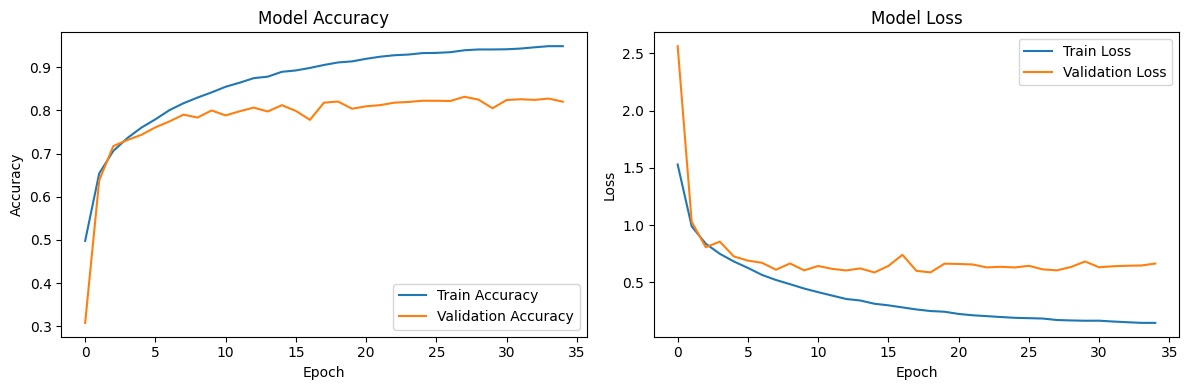

In [9]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


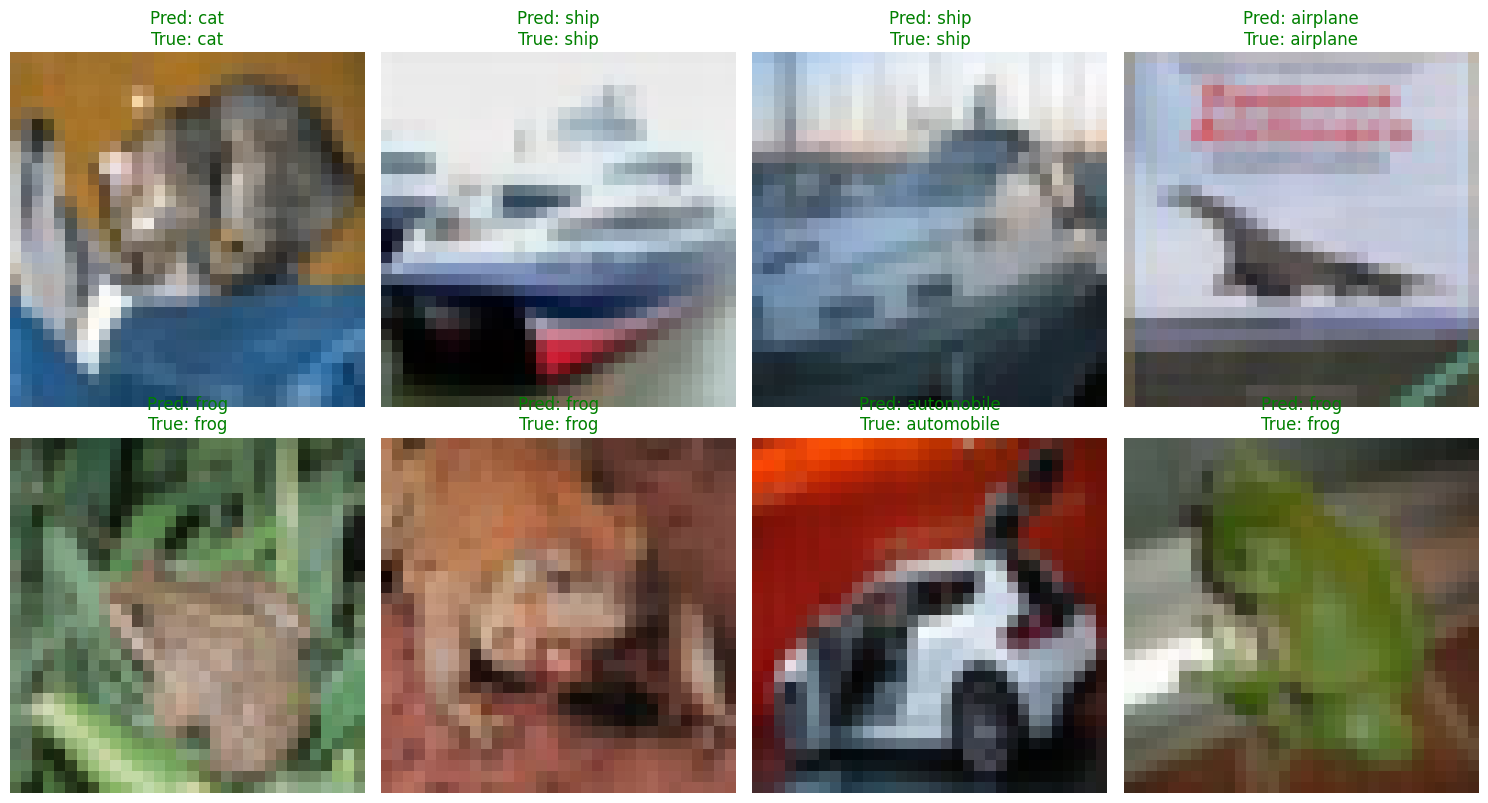

Practical 1 completed.


In [13]:
num_images = 8
predictions = model.predict(x_test[:num_images])
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test[:num_images], axis=1)

plt.figure(figsize=(15, 8))
for i in range(num_images):
    plt.subplot(2, 4, i+1)
    plt.imshow(x_test[i])
    plt.title(f"Pred: {class_names[predicted_classes[i]]}\nTrue: {class_names[true_classes[i]]}",
              color=("green" if predicted_classes[i] == true_classes[i] else "red"))
    plt.axis('off')
plt.tight_layout()
plt.show()
# Optional: Save the model
# model.save("basic_cifar10_cnn.h5")
print("Practical 1 completed.")